### Imports

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
from pathlib import Path

import gvpy as gv
import sbemoored as sbe

%reload_ext autoreload
%autoreload 2
%autosave 300

%config InlineBackend.figure_format = 'retina'

Autosaving every 300 seconds


In [2]:
import bltproc as bp
bp.thermistors.test()

hello world!


In [4]:
pd.set_option('display.max_colwidth', None)

# BLT SBE56 Processing

This is version 2 of the processing code where I have moved a number of processing functions into the `bltproc` module. The old version can still be found in the `old/` directory.

## class

In [5]:
B = bp.thermistors.blt1_sbe56_proc()

In [6]:
B.update_proc_info()

In [7]:
B.proc_info.head()

,utc,inst,cal1,cal2,Notes,processed,raw_data_exists,figure_exists,comment
SN,,,,,,,,,
345,NaT,NaT,2021-07-07 05:50:30+00:00,2021-10-06 14:06:00+00:00,FLOODED,False,False,False,ok
376,2021-10-07 13:45:00+00:00,2021-10-07 13:45:06+00:00,2021-07-07 05:41:00+00:00,2021-10-06 14:06:00+00:00,NaN,True,True,True,ok
392,2021-10-07 10:40:00+00:00,2021-10-07 10:40:09+00:00,2021-07-07 05:50:30+00:00,2021-10-06 14:06:00+00:00,62 events,True,True,True,ok
393,2021-10-07 20:15:20+00:00,2021-10-07 20:15:29+00:00,2021-07-06 06:56:00+00:00,2021-10-06 14:06:00+00:00,NaN,True,True,True,ok
395,2021-10-07 10:47:00+00:00,2021-10-07 10:47:12+00:00,2021-07-06 06:56:00+00:00,2021-10-06 14:06:00+00:00,NaN,True,True,True,ok


In [8]:
B.proc_next()

all files processed


Work out the 455 issue. We do not apply any time drift correction for this sensor during the initial processing and need to construct the time vector based on the clock calibration warm water dips.

In [9]:
B.fix_sn455()

455 already fixed, only adding a comment to proc_info


Now we are done with the basic processing.

Load all time series

In [10]:
B.load_all_nc()

Loop over all thermistors and find gaps.
We want to know
- if a thermistor has gaps at all
- if and when the first long gap occurs
- how many shorter gaps (<1h) occur before the first long gap

In [11]:
B.locate_gaps()

date of first long gap:
392 : 2021-09-23
393 : 2021-09-20
413 : 2021-09-20
418 : no long gap
421 : 2021-09-07
423 : 2021-09-16
425 : 2021-09-24
455 : 2021-08-05
477 : 2021-09-05
915 : 2021-09-16
916 : 2021-09-17
5462 : 2021-10-04
6418 : 2021-09-22
6420 : 2021-09-26
6424 : 2021-09-16
6431 : no long gap
6437 : 2021-09-15
6441 : 2021-09-25
6443 : 2021-09-30
6446 : 2021-09-29
number of short gaps:
392 : 1
393 : 1
413 : 1
418 : 1
421 : 1
423 : 1
425 : 1
455 : 1
477 : 1
915 : 1
916 : 2
5462 : 7
6418 : 1
6420 : 3
6424 : 1
6431 : 1
6437 : 1
6441 : 1
6443 : 1
6446 : 2


In [12]:
B.comment_short_gaps()

In [13]:
B.comment_long_gap_termination()

Make a note of the thermistors that do not have the warm water dip at the end because they were not measuring anymore. Most of them still had the clock running so should be fine.

In [14]:
B.comment_no_time_verification_at_end()

Add a comment if no data file exists, just to get rid of the ok mark.

In [15]:
B.comment_no_data()

Only one of the thermistors really ends too early (6432):

In [16]:
B.comment_terminates_early()

6432 : 2021-08-02T04:19:21.000000000


Remove nan's in Notes

In [17]:
B.comment_remove_nan_notes()

Show `proc_info` for all SNs that had any issues.

In [18]:
B.show_instrument_issues()

,Notes,processed,raw_data_exists,figure_exists,comment
SN,,,,,
345,FLOODED,False,False,False,no data
392,62 events,True,True,True,has 1 short gap (<1h)\\terminates 2021-09-23\\no final warm water clock cal
393,,True,True,True,has 1 short gap (<1h)\\terminates 2021-09-20
413,62 events,True,True,False,has 1 short gap (<1h)\\terminates 2021-09-20
418,,True,True,False,has 1 short gap (<1h)
421,62 events,True,True,False,has 1 short gap (<1h)\\terminates 2021-09-07
423,62 events,True,True,False,has 1 short gap (<1h)\\terminates 2021-09-16
425,62 events,True,True,False,has 1 short gap (<1h)\\terminates 2021-09-24\\no final warm water clock cal
455,61 EVENTS Time incorrect,True,True,True,time vector adjusted based on clock calibrations\\has 1 short gap (<1h)\\terminates 2021-08-05


In [19]:
B.comments_to_latex_table()

## cut and cal

In [35]:
B.load_ctd_cal()
B.load_mooring_sensor_info()

In [82]:
tmp = B.cut_and_cal(392)
sbe.sbe56.plot(tmp, figure_out=Path('.'))
plt.close()

In [72]:
B.generate_all_level1()

no cal for 455


## plot level 1 time series

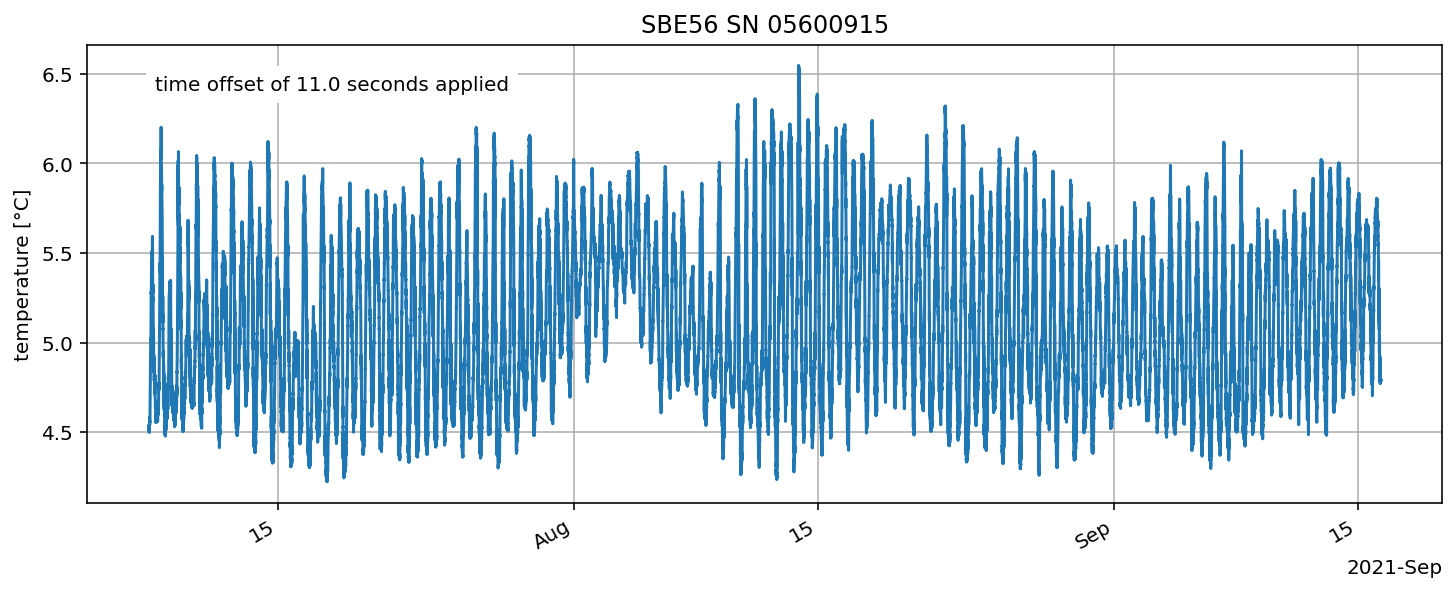

In [20]:
th = B.plot_level1(915)

Plot level 1 data and save all figures to

In [23]:
print(B.figure_out_level1)

/Users/gunnar/Projects/blt/data/BLT/Moorings/BLT1/MAVS/SBE56/fig_L1


In [89]:
B.plot_all_level1()

  0%|          | 0/54 [00:00<?, ?it/s]

## plot spectra

This is still from v1 of this notebook and needs to be adapted to the new code structure if desired.

In [349]:
tmp = allnc[10]

In [383]:
tmp.size/8

511709.75

In [449]:
def plot_spectrum(thermistor, window=8):
    g = thermistor.data
    sampling_period = thermistor.attrs['sampling period in s']
    if sampling_period == 0.5:
        sampling_period = 1
        omega_factor = 2
    else:
        omega_factor = 1
            
    Pcw, Pccw, Ptot, omega = gv.signal.psd(g, sampling_period, ffttype='t', window='hanning', tser_window=g.size/window)
    omega = omega * omega_factor
    f = 0.426

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5), constrained_layout=True)
    freqs = np.array([24 / (14 * 24), 24 / 12.4, 2 * 24 / 12.4, 4 * 24 / 12.4, f, 2 * f, 1, 24, 24/(24/24/6), 24/(24/24/60), 24/(24/24/60/6)])
    freq_labels = ["fortnightly", "M2", " \n2M2", "4M2", " \nf", " \n2f", "K1", "1h", "10m", "1m", "10s"]
    for freq in freqs:
        ax.vlines(freq, 1e-6, 1e4, color="C0", alpha=1, linestyle="-", linewidth=0.75)
    ax.plot(omega * (3600 * 24) / (2 * np.pi), np.real(Ptot), linewidth=1, color="0.2")
    ax.set(xscale="log", yscale="log", xlim=(2.1e-2, 5e4), ylim=(1e-7, 5e5), title=thermistor.attrs['SN'][-4:])
    ax = gv.plot.axstyle(ax, ticks="in", grid=True, spine_offset=10)
    gv.plot.gridstyle(ax, which="both")
    gv.plot.tickstyle(ax, which="both", direction="in")
    # ax2 = ax.twinx()
    ax2 = ax.secondary_xaxis(location="bottom")
    ax2 = gv.plot.axstyle(ax2, ticks="in", grid=False, spine_offset=30)
    ax2.xaxis.set_ticks([])
    ax2.xaxis.set_ticklabels([])
    ax2.minorticks_off()
    ax2.xaxis.set_ticks(freqs)
    ax2.xaxis.set_ticklabels(freq_labels);
    plot_name = figure_out.joinpath(f'spectrum_{thermistor.attrs["SN"]}')
    gv.plot.png(plot_name)

saving to /Users/gunnar/Projects/blt/data/BLT/Moorings/BLT1/MAVS/SBE56/fig/


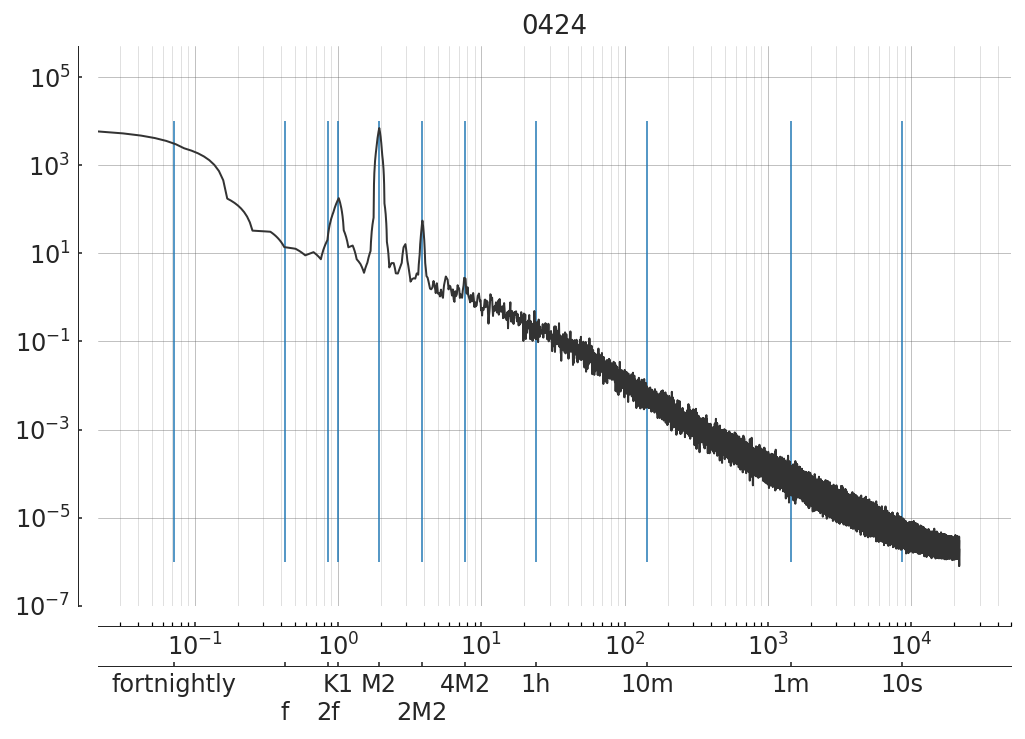

In [450]:
plot_spectrum(allnc[10])

In [452]:
# for thermistor in allnc:
#     plot_spectrum(thermistor)